# Homework 2 

## Introduction

In this notebook a couple tasks, feature selection and dimension reduction, important in data mining, will be performed to a data set on simulate gamma values of a telescope obtained in 2004. This data set has 11 attributes of which 10 are numerical features and 1 is a categorical feature. This notebook will first present **Feature Selection** and then **Dimension Reduction**.

## Feature Selection

There are two techniques that can be used to do the process of **Feature Selection**:
    1. **Pearson’s correlation coefficient**, that measures linear correlation between two variables X and Y. The values can range from -1 to +1 but in this case the values will be absoluted to get values ranging from 0 to 1.
    2. **ANOVA**, used to analyze the differences among group means in a sample.

### Pearson’s correlation coefficient

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("DATA/magic.csv",header = 0)
print(df.shape)
df.head()

df['class'] = df['class'].map({'g':1,'h':0})
dummy=df.values

X=dummy[:,:10]
y=dummy[:,10]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

(19020, 11)


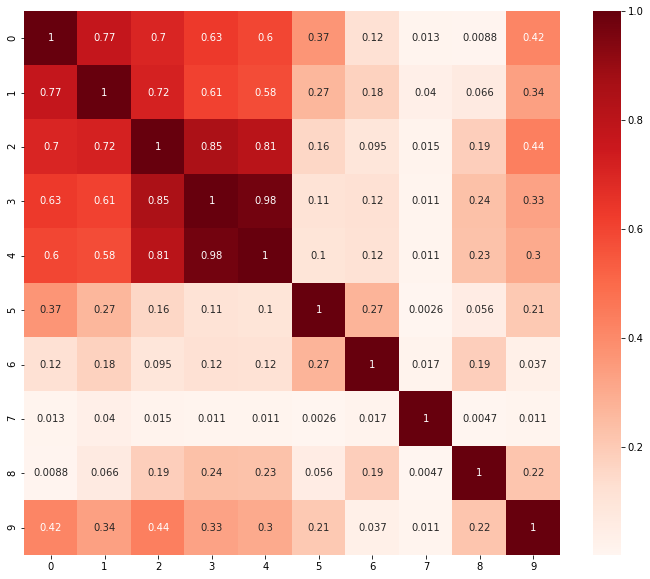

In [3]:
df = pd.DataFrame(X)
# Create correlation matrix
corr_matrix = df.corr().abs()
#print(corr_matrix.shape)
plt.figure(figsize=(12,10))

sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] < 0.01)]
print(to_drop)

[7, 8]


With **Pearson’s correlation coefficient** it is possible to identify the two best numerical features which are 3 and 4, with the lowest linear correlation.

### Anova

The code presented next does the ranking using the ANOVA methode, the results are presented bellow. Contrary to the **Pearson’s correlation coefficient**, here we get a ranking of all the features instead of a pair-comparasion between features.

['order', 'index', 'f-score']
1º:  8     3603.7774853546375
2º:  0     1407.673623512908
3º:  1     1029.9322404533289
4º:  6     496.5866576984908
5º:  5     395.6093466970545
6º:  2     197.50682024771487
7º:  9     61.950158622117875
8º:  3     7.665199607892476
9º:  7     1.131220746754784
10º:  4     0.2515967011380878
[8, 0, 1, 6, 5, 2, 9, 3, 7, 4]


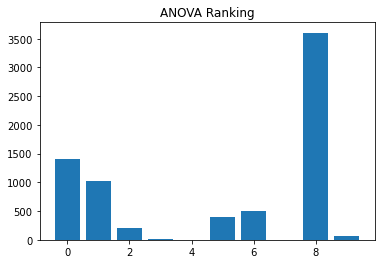

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

N = 10

k_bestfeatures = SelectKBest(score_func = f_classif)
rankings = k_bestfeatures.fit(X_train,y_train)
b=list(rankings.scores_)
a=list(range(0,len(b)))


sf = [g for _,g in sorted(zip(b,a))]
sf=sf[len(a)-N:len(a)]
c=1
sf=reversed(sf)
print(['order','index','f-score'])
inx=[]
x_points = []
y_points = []

for chosen in sf:
    print(str(c)+'º: ', chosen,'   ', b[chosen])
    c+=1
    inx.append(chosen)
    x_points.append(chosen)
    y_points.append(b[chosen])
print(inx)

plt.bar(x_points , y_points)
plt.title('ANOVA Ranking')
plt.show()


With the **ANOVA** process the best two features are discriminative.

## Feature reduction

### PCA

**PCA** aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one. To apply this algorithm we need to **standardize the dataset** and apply the **PCA** to the dataset.

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

In [7]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
print(X_train_pca)
print(X_train_pca.shape)

[[-2.65630997  0.93526893]
 [ 2.11745506 -1.24531617]
 [-1.10778506 -0.70977067]
 ...
 [-1.87025606  0.58499652]
 [-0.62297897  1.45751025]
 [ 2.56237836 -2.01425919]]
(13314, 2)


#### KPCA

KPCA, Kernel principal component analysis, is an extension of principal component analysis (PCA). To execute this algorithm we need to select the **number of components** and the **kernel**.

In [8]:
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=2, kernel='linear')
X_transformed = transformer.fit_transform(X_train_std)

print(X_transformed)
print(X_transformed.shape)

[[-0.81341724  0.43814977]
 [ 0.97886903  0.03954671]
 [-0.40766589 -0.61133723]
 ...
 [-0.83976711  0.00808302]
 [-0.28589456  0.69458578]
 [ 0.93786467 -0.0831583 ]]
(13314, 2)
